# scipyによるstft計算とlibrosaを用いたスペクトログラムの表示

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

In [2]:
IN_WAVE_FILE = "in.wav"  # モノラル音声（前提）

FRAME_LENGTH = 1024  # フレーム長
HOP_LENGTH = 80  # フレームのシフト長

In [3]:
# 音声データ読み込み (fsがサンプリング周波数、dataは音声データ)
fs, data = wavfile.read(IN_WAVE_FILE)
data = data.astype(np.float64)

In [4]:
# 短時間フーリエ変換（結果は複素数の系列）
data_stft = librosa.stft(data, hop_length=HOP_LENGTH, n_fft=FRAME_LENGTH)

In [5]:
# 振幅スペクトル（絶対値）
data_ampspec = np.abs(data_stft)

# 振幅スペクトルをデシベルスケールにする
data_ampspec_dB = librosa.amplitude_to_db(data_ampspec, ref=np.max)

## 振幅スペクトル系列の表示

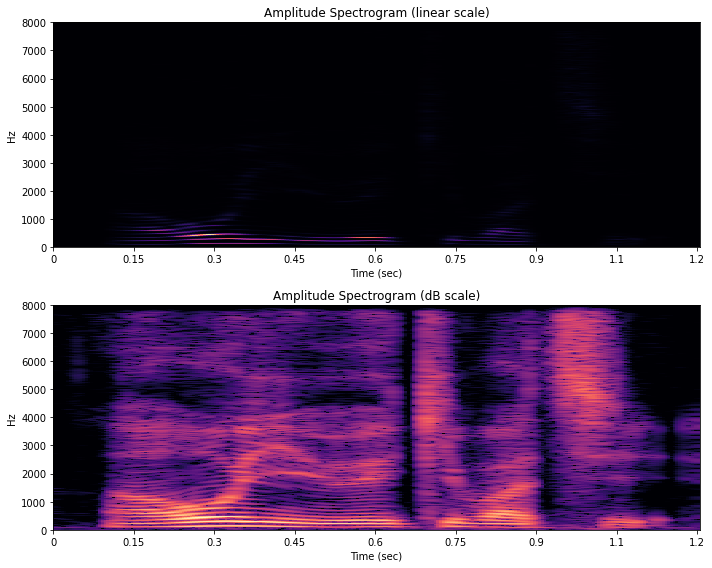

In [6]:
# 振幅スペクトル系列の表示 (y軸はlinearスケール(Hz))
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
librosa.display.specshow(
    data_ampspec,
    x_axis="time",
    y_axis="linear",
    hop_length=HOP_LENGTH,
    sr=fs,
    ax=axes[0],
)
axes[0].set_xlabel("Time (sec)")
axes[0].set_ylabel("Hz")
axes[0].set_title("Amplitude Spectrogram (linear scale)")
librosa.display.specshow(
    data_ampspec_dB,
    x_axis="time",
    y_axis="linear",
    hop_length=HOP_LENGTH,
    sr=fs,
    ax=axes[1],
)
axes[1].set_xlabel("Time (sec)")
axes[1].set_ylabel("Hz")
axes[1].set_title("Amplitude Spectrogram (dB scale)")
plt.tight_layout()
plt.show()

## 振幅スペクトル系列の表示 (y軸が対数スケール)

/usr/local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


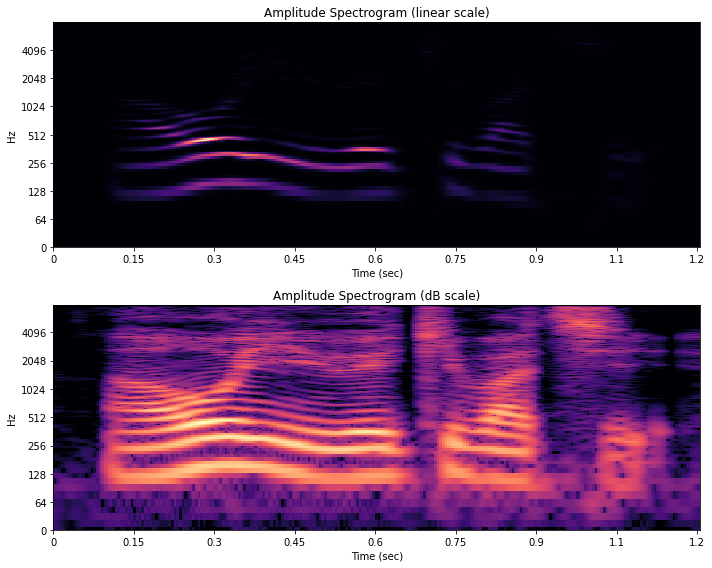

In [7]:
# 振幅スペクトル系列の表示 (y軸が対数スケール)
# matplotlib由来の警告が出ますが気にしない (librosa側が未対応)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
librosa.display.specshow(
    data_ampspec,
    x_axis="time",
    y_axis="log",
    hop_length=HOP_LENGTH,
    sr=fs,
    ax=axes[0],
)
axes[0].set_xlabel("Time (sec)")
axes[0].set_ylabel("Hz")
axes[0].set_title("Amplitude Spectrogram (linear scale)")
librosa.display.specshow(
    data_ampspec_dB,
    x_axis="time",
    y_axis="log",
    hop_length=HOP_LENGTH,
    sr=fs,
    ax=axes[1],
)
axes[1].set_xlabel("Time (sec)")
axes[1].set_ylabel("Hz")
axes[1].set_title("Amplitude Spectrogram (dB scale)")
plt.tight_layout()
plt.show()

## 位相スペクトル系列の計算と表示

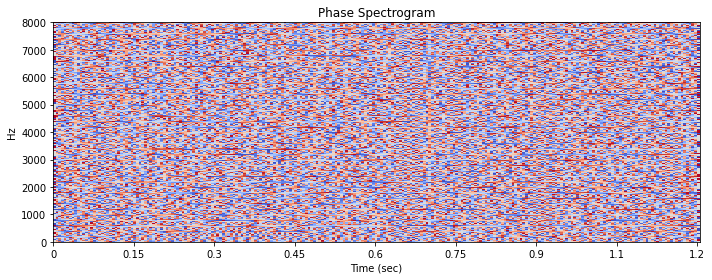

In [8]:
# 位相スペクトル系列の計算
data_phasespec = np.angle(data_stft)

# 位相スペクトル系列の表示
plt.figure(figsize=(10, 4))
librosa.display.specshow(
    data_phasespec, x_axis="time", y_axis="linear", hop_length=HOP_LENGTH, sr=fs
)
plt.xlabel("Time (sec)")
plt.ylabel("Hz")
plt.title("Phase Spectrogram")
plt.tight_layout()
plt.show()